# Run GSGP on Boolean Functions

## Effectiveness Analysis
### Training set perspective:
$ Pr\{f(x)=g(x) | x = Unif(\{0, 1\}^n)\} $

   $ = Pr\{f(x)=g(x) | x \in S\} \times Pr\{x \in S | x = Unif(\{0, 1\}^n)\} $

   $ + Pr\{f(x)=g(x) | x \notin S\} \times Pr\{x \notin S | x = Unif(\{0, 1\}^n)\} $

   $ \leq 1 \times \frac{n^c}{2^n} + \frac{1}{2} \times (1 - \frac{n^c}{2^n}) = \frac{1}{2} + \frac{1}{2} \times \frac{n^c}{2^n} = \frac{1}{2} + 2^{-\Omega(n)} = \frac{1}{2} + o(1) $

### Mutation block perpective:
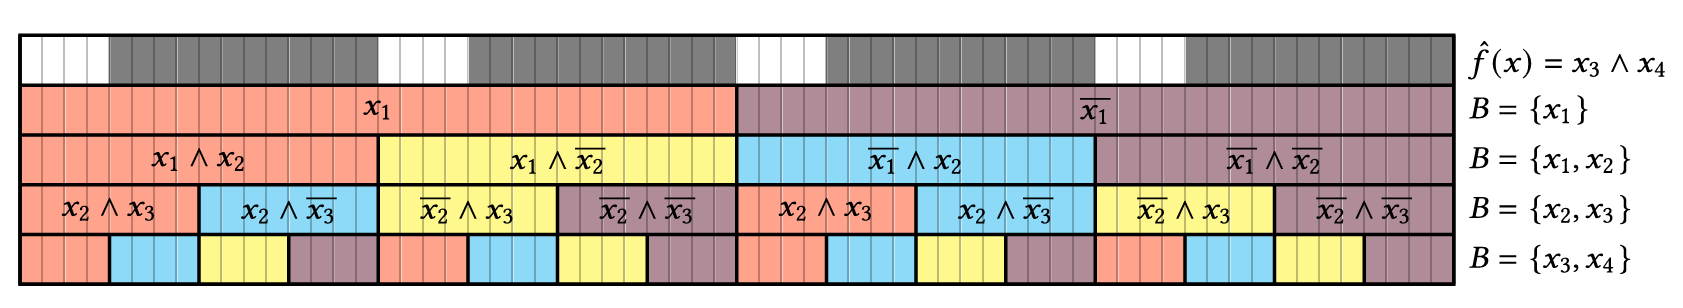
The first row represents the target function (True on white cells, Flase on gray cells). Each small cell corresponds to an assignment of all variables.

The 2, 3, 4 rows shows how blocks are partitioned with certain bases. A base with size $|B|$ divides the whole space into $2^{|B|}$ blocks (colors). During the training process, we repeatedly select a block, test training samples on it.

Training set are arbitrarily selected cells. Samples inside a single block `M` may all be True (white), resulting in concatenating `or M` at the end. Samples in `M` all being False leads to concatenating `and not M` at the end. `M` is useless to the problem if `M` contains no samples or contains both truth values.

In [22]:
from itertools import product
from operators import *

## Hyper-Parameters

`l_B`: Size of bases

`l_S`: Size of training set

In [23]:
l_B = 3
l_S = 5

## Define Program

`TRUTH_VALUES` is all combinations of variables

`S` is the training set. Algorithm will minimize the difference with `S` 

`F(x)` is the target program 

In [24]:
TRUTH_VALUES = [list(p) for p in product([0, 1], repeat=4)]

S = random.sample(TRUTH_VALUES, l_S)

def F(x):
    return bool(x[2] and x[3])

## Define Bases

`B` is which variable we can use to generate program

`P(x)` is the initial program

In [ ]:
B = random.sample(range(0, 4), l_B)
print(B)

def P(x):
    return True

[1, 2, 3]


## (1+1) FBM-GSGPs (iterations with static training set)

`FBM` operator ensures the error decrease by 0 or 1 each iteration

```text
FBM
    for var in B
        50%: M &= var
        50%: M &= ~var
    M represents one real-value combination of variables in B
    50: P |= M
    50: P &= ~M
```

For all `x` in training set, if `M(x)` agrees with `F(x)` on more cases, `P(x) | M(x)` will be retained; otherwise if `M(x)` disagrees with `F(x)` on more cases, then `P(x) & ~M(x)` will be retained. This operator fixes 1 or 0 case each iteration.

In [26]:
error = len(TRUTH_VALUES)
for _ in range(1000):
    P_ = fbm(P, B)
    err = sum(1 for x in S if F(x) != P_(x))
    if err < error:
        error = err
        P = P_
print(error)

score = len(TRUTH_VALUES)
for x in TRUTH_VALUES:
    p = P(x)
    f = F(x)
    if p != f:
        print("f(", x, "):", f)
        print("P(", x, "):", p)
        print()
        score -= 1
print('Accuracy:', score, '/', len(TRUTH_VALUES))

0
f( [0, 0, 0, 1] ): False
P( [0, 0, 0, 1] ): True

f( [0, 1, 0, 0] ): False
P( [0, 1, 0, 0] ): True

f( [0, 1, 0, 1] ): False
P( [0, 1, 0, 1] ): True

f( [1, 0, 0, 1] ): False
P( [1, 0, 0, 1] ): True

f( [1, 1, 0, 0] ): False
P( [1, 1, 0, 0] ): True

f( [1, 1, 0, 1] ): False
P( [1, 1, 0, 1] ): True

Accuracy: 10 / 16


## (1+1) FBM-GSGP (iterations with dynamic training set)

Training set is randomly selected from all truth values each iteration

In [27]:
B = [1, 2]
def P(x):
    return bool(1)

In [28]:
error = len(TRUTH_VALUES)
for _ in range(1000):
    P_ = fbm(P, B)
    S = random.sample(TRUTH_VALUES, l_S)
    err = sum(1 for s in S if F(s) != P_(s))
    if err < error:
        error = err
        P = P_
print(error)

score = len(TRUTH_VALUES)
for x in TRUTH_VALUES:
    p = P(x)
    f = F(x)
    if p != f:
        print("f(", x, "):", f)
        print("P(", x, "):", p)
        print()
        score -= 1
print('Accuracy:', score, '/', len(TRUTH_VALUES))

0
f( [0, 0, 0, 0] ): False
P( [0, 0, 0, 0] ): True

f( [0, 0, 0, 1] ): False
P( [0, 0, 0, 1] ): True

f( [0, 0, 1, 1] ): True
P( [0, 0, 1, 1] ): False

f( [0, 1, 1, 0] ): False
P( [0, 1, 1, 0] ): True

f( [1, 0, 0, 0] ): False
P( [1, 0, 0, 0] ): True

f( [1, 0, 0, 1] ): False
P( [1, 0, 0, 1] ): True

f( [1, 0, 1, 1] ): True
P( [1, 0, 1, 1] ): False

f( [1, 1, 1, 0] ): False
P( [1, 1, 1, 0] ): True

Accuracy: 8 / 16
